In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## 8.

In [2]:
data=pd.read_csv("Auto.csv")
for i in range(397):
    try:
        int(data.horsepower[i])
    except:
        data=data.drop(index=i,axis=0)
data["horsepower"]=data.horsepower.astype("int64")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Text(0,0.5,'mpg')

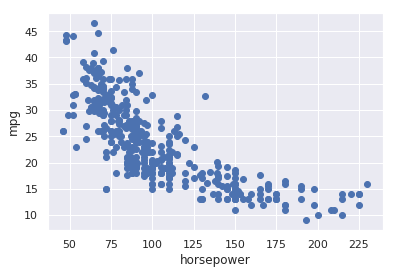

In [4]:
plt.scatter(data=data,x="horsepower",y="mpg",)
plt.xlabel("horsepower")
plt.ylabel("mpg")

In [5]:
lr=sm.OLS.from_formula("mpg~horsepower",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           7.03e-81
Time:                        17:56:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

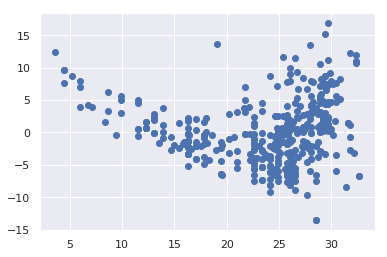

In [6]:
plt.scatter(x=results.fittedvalues,y=results.resid)

In [7]:
x=np.array([1,98])

In [8]:
print("predicted value",results.params.dot(x))

predicted value 24.467077152512424


In [9]:
print("with 95% confidence interval")
for i in results.conf_int().T.dot(x):
    print(round(i,2),end=" ")

with 95% confidence interval
21.81 27.12 

/home/ankit/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


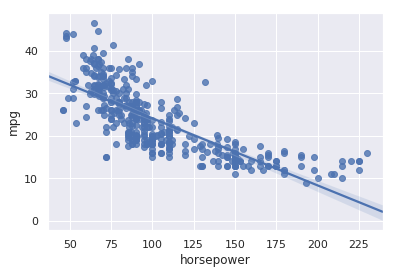

In [10]:
sns.regplot(x=data.horsepower,y=data.mpg,fit_reg=True)

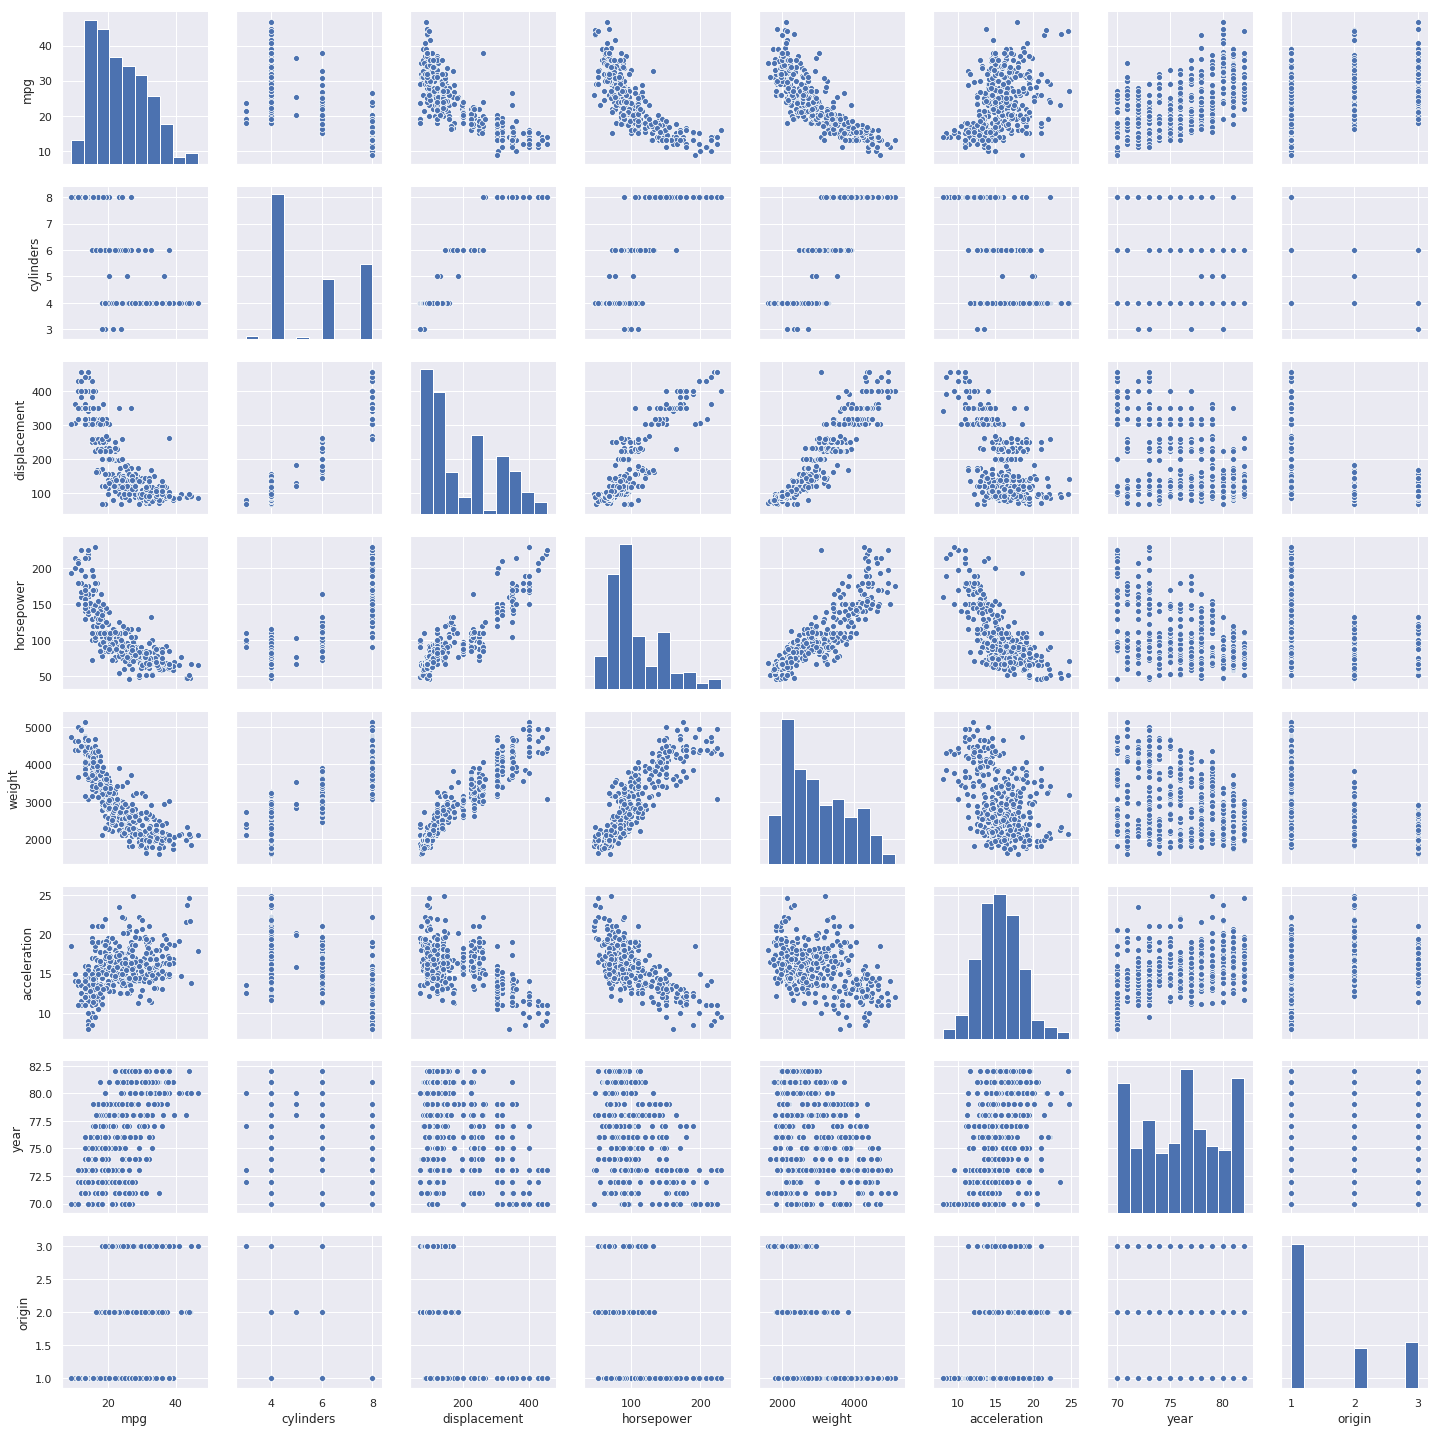

In [11]:
sns.pairplot(data)

In [12]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


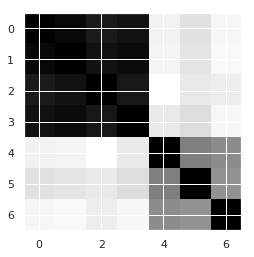

In [13]:
plt.imshow(data.drop(["mpg"],axis=1).corr(),cmap="Greys",)

In [14]:
lr=sm.OLS.from_formula("mpg~"+"+".join(data.columns.difference(["mpg","name"])),data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          2.04e-139
Time:                        17:57:00   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
origin           1.4261      0.278      5.127      0.000       0.879       1.973
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
year             0.7508      0.051     14.729      0.000       0.651       0.851
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

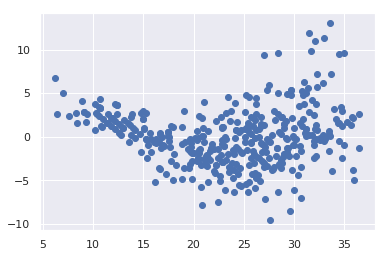

In [15]:
plt.scatter(x=results.fittedvalues,y=results.resid)

In [16]:
vif=1/(1-results.rsquared_adj)
print(vif,"tolerable multicollinearity")

5.501269353041519 tolerable multicollinearity


In [17]:
data=pd.read_csv("Auto.csv")
for i in range(397):
    try:
        int(data.horsepower[i])
    except:
        data=data.drop(index=i,axis=0)
data["horsepower"]=data.horsepower.astype("int64")
for i in ["cylinders","horsepower","displacement","weight"]:
    data[i]=(data[i]-min(data[i]))/(max(data[i])-min(data[i]))
data["new"]=data["horsepower"]+data["displacement"]+data["weight"]+data["cylinders"]
data["new"]=data["new"]/4.

In [18]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,new
0,18.0,1.0,0.617571,0.456522,0.536150,12.0,70,1,chevrolet chevelle malibu,0.652561
1,15.0,1.0,0.728682,0.646739,0.589736,11.5,70,1,buick skylark 320,0.741289
2,18.0,1.0,0.645995,0.565217,0.516870,11.0,70,1,plymouth satellite,0.682021
3,16.0,1.0,0.609819,0.565217,0.516019,12.0,70,1,amc rebel sst,0.672764
4,17.0,1.0,0.604651,0.510870,0.520556,10.5,70,1,ford torino,0.659019


In [19]:
features="+".join(list(data.columns.difference(["mpg","name"])))

In [20]:
data.drop(["mpg","cylinders","horsepower","displacement","weight"],axis=1).corr()

,acceleration,year,origin,new
acceleration,1.000000,0.290316,0.212746,-0.551607
year,0.290316,1.000000,0.181528,-0.371280
origin,0.212746,0.181528,1.000000,-0.583493
new,-0.551607,-0.371280,-0.583493,1.000000


## 9.

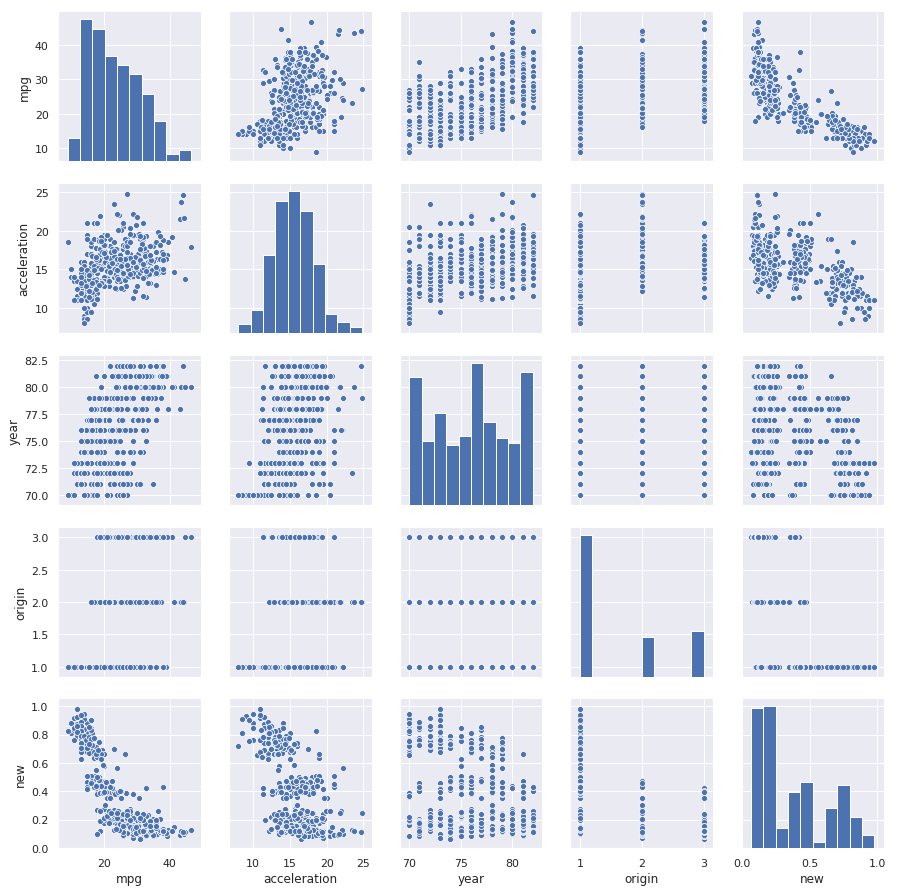

In [21]:
sns.pairplot(data.drop(["cylinders","horsepower","displacement","weight"],axis=1))

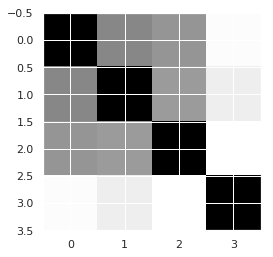

In [22]:
plt.imshow(data.drop(["mpg","cylinders","horsepower","displacement","weight"],axis=1).corr(),cmap="Greys",)

In [23]:
lr=sm.OLS.from_formula("mpg~acceleration+year+origin+new",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     360.5
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          4.77e-129
Time:                        17:57:03   Log-Likelihood:                -1056.8
No. Observations:                 392   AIC:                             2124.
Df Residuals:                     387   BIC:                             2143.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.7326      4.398     -4.714      0.000     -29.380     -12.085
acceleration    -0.1922      0.081     -2.378      0.018      -0.351      -0.033
year             0.6968      0.054     12.973      0.000       0.591       0.802
origin           1.2666      0.283      4.479      0.000       0.711       1.823
new            -20.3768      1.074    -18.972      0.000     -22.489     -18.265
==============================================================================
Omnibus:                       40.354   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.646
Skew:                           0.570   Prob(JB):                     6.86e-19
Kurtosis:                       4.955   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
vif=1/(1-results.rsquared_adj)
print(vif,"tolerable multicollinearity")

4.6772791785643015 tolerable multicollinearity


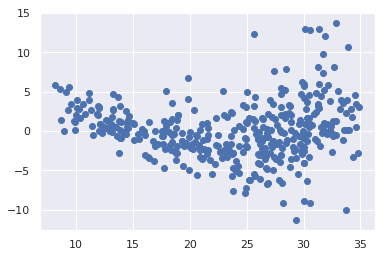

In [25]:
plt.scatter(x=results.fittedvalues,y=results.resid)

## 10.

In [26]:
data=pd.read_csv("Carseats.csv",index_col=0)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


no multicollinearty


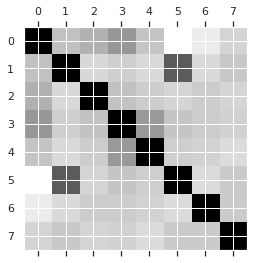

In [27]:
plt.matshow(data.corr(),cmap="Greys")
print("no multicollinearty")

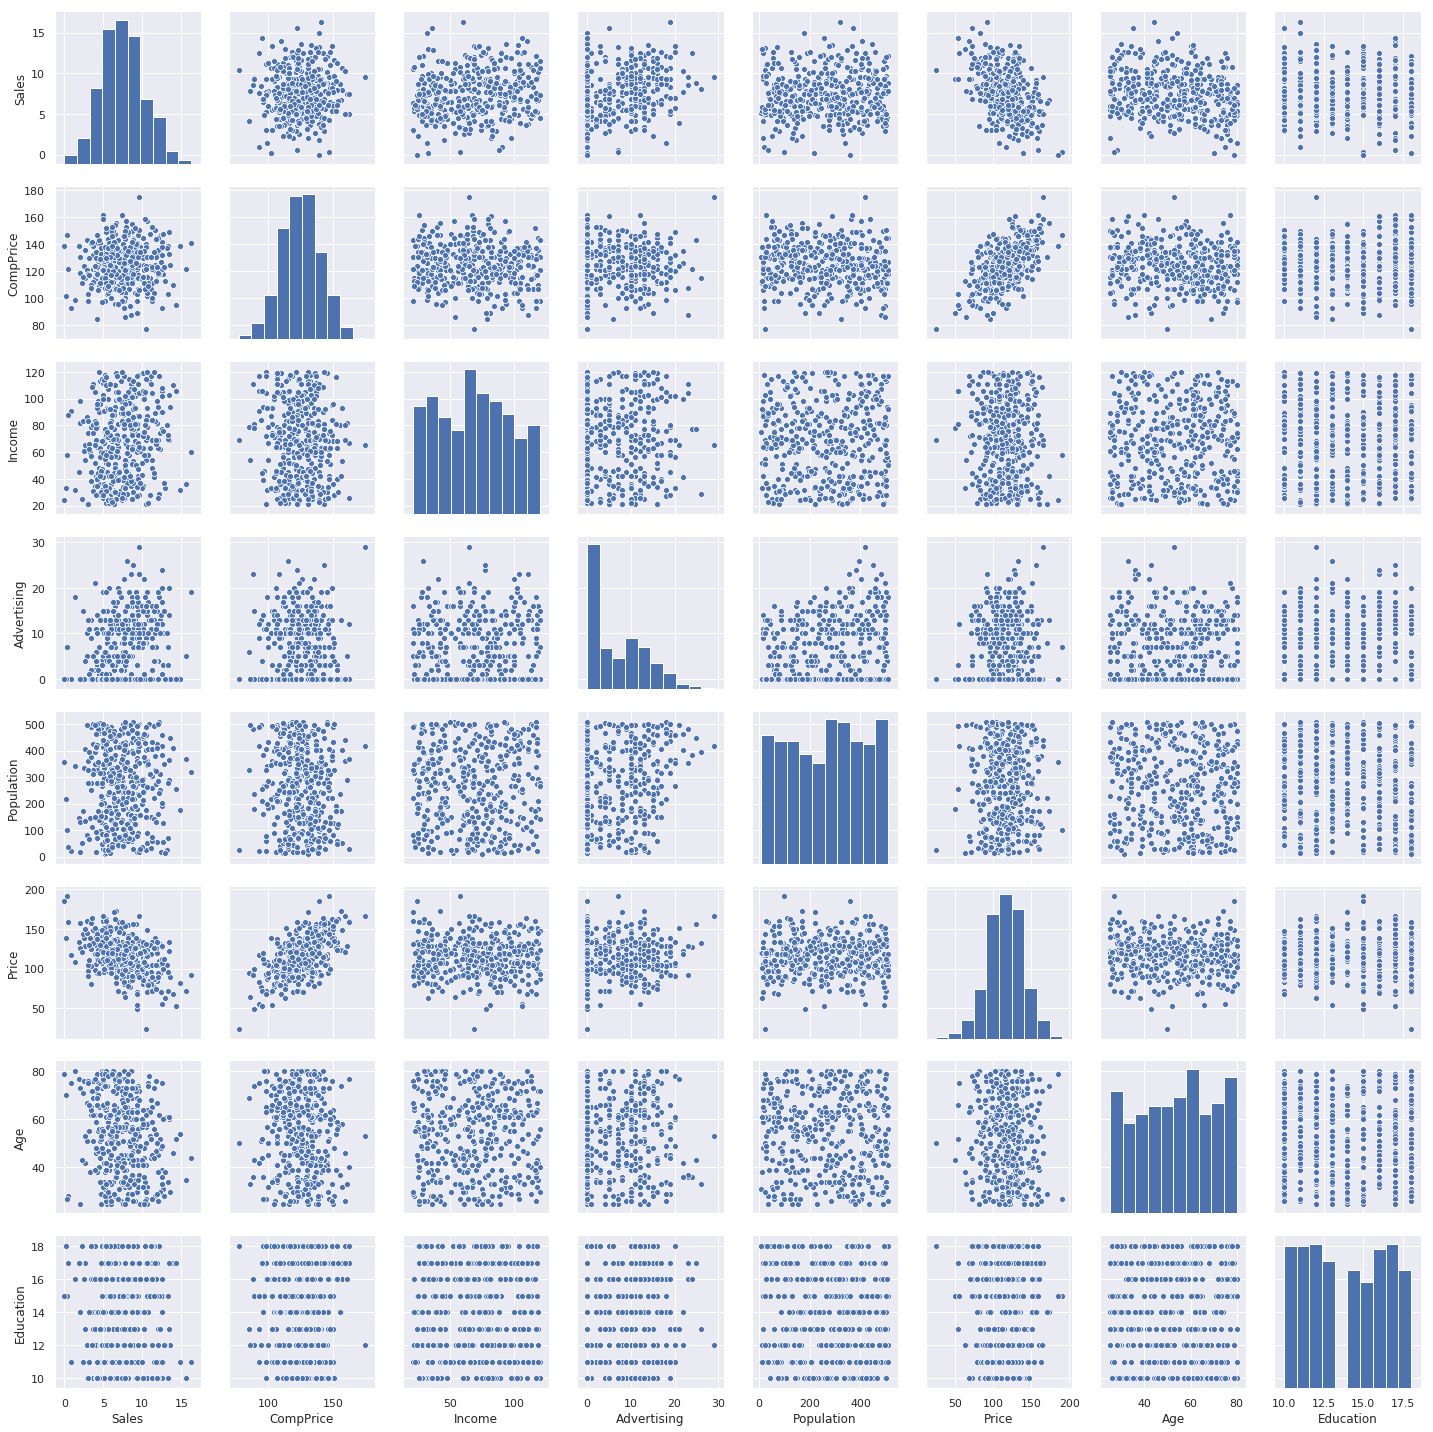

In [28]:
sns.pairplot(data)

In [29]:
lr=sm.OLS.from_formula("Sales~Price+Urban+US",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           2.39e-23
Time:                        17:57:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lr=sm.OLS.from_formula("Sales~Price+US",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           2.66e-24
Time:                        17:57:08   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

derbin watson = (1,3) --> no autocorrelation
no pattern --> no autocorrelation


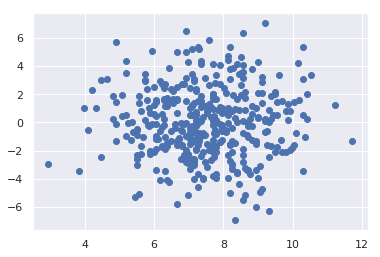

In [31]:
plt.scatter(x=results.fittedvalues,y=results.resid)
print("derbin watson = (1,3) --> no autocorrelation")
print("no pattern --> no autocorrelation")

In [32]:
print("95% confi interval --> 5% error or alpha")
results.conf_int(alpha=0.05)

95% confi interval --> 5% error or alpha


,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


# 11.

In [33]:
np.random.seed(1)
x=np.random.randn(100)
y=2*x+np.random.randn(100)

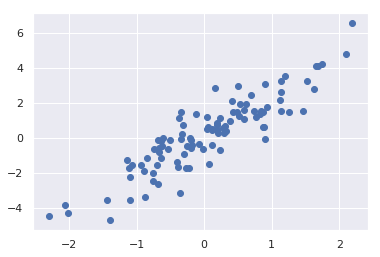

In [34]:
plt.scatter(x=x,y=y)

In [35]:
lr=sm.OLS(y,x)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           3.46e-36
Time:                        17:57:08   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lr=sm.OLS(x,y)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           3.46e-36
Time:                        17:57:08   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lr=sm.OLS(y,sm.add_constant(x))
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           5.39e-36
Time:                        17:57:08   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lr=sm.OLS(x,sm.add_constant(y))
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           5.39e-36
Time:                        17:57:08   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 13.

In [39]:
x=np.random.normal(loc=0,scale=1,size=(100))
e=np.random.normal(loc=0,scale=0.25,size=(100))
y=0.5*x-1+e

In [40]:
lr=sm.OLS(y,sm.add_constant(x))
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     331.1
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           3.42e-33
Time:                        17:57:09   Log-Likelihood:                -9.3679
No. Observations:                 100   AIC:                             22.74
Df Residuals:                      98   BIC:                             27.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0050      0.027    -37.436      0.000      -1.058      -0.952
x1             0.4861      0.027     18.197      0.000       0.433       0.539
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

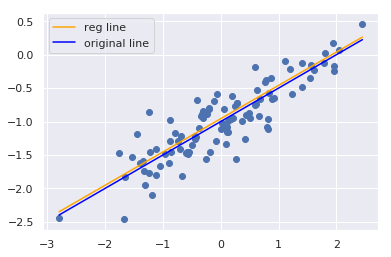

In [41]:
min_x=min(x)
max_x=max(x)
plt.scatter(x=x,y=y)
plt.plot([min(x),max(x)],[-0.9570+0.4982*min(x),-0.9570+0.4982*max(x)],color="Orange",label="reg line")
plt.plot([min(x),max(x)],[-1+0.5*min(x),-1+0.5*max(x)],color="Blue",label="original line")
plt.legend()

In [42]:
data=pd.DataFrame({"x":x,"y":y})

In [43]:
data

,x,y
0,-0.400878,-0.683993
1,0.824006,-0.955786
2,-0.562305,-1.488696
3,1.954878,-0.242705
4,-1.331952,-1.735750
5,-1.760689,-1.474632
6,-1.650721,-1.822022
7,-0.890556,-1.618951
8,-1.119115,-1.404107
9,1.956079,-0.171912


In [44]:
lr=sm.OLS.from_formula("y~x+np.square(x)",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     164.7
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           6.48e-32
Time:                        17:57:10   Log-Likelihood:                -9.1716
No. Observations:                 100   AIC:                             24.34
Df Residuals:                      97   BIC:                             32.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0175      0.034    -30.157      0.000      -1.084      -0.951
x                0.4842      0.027     17.957      0.000       0.431       0.538
np.square(x)     0.0124      0.020      0.618      0.538      -0.028       0.052
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.122
Skew:                          -0.040   Prob(JB):                        0.941
Kurtosis:                       3.151   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
x=np.random.normal(loc=0,scale=1,size=(100))
e=np.random.normal(loc=0,scale=0.05,size=(100))
y=0.5*x-1+e

In [46]:
lr=sm.OLS(y,sm.add_constant(x))
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9923.
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          2.71e-100
Time:                        17:57:10   Log-Likelihood:                 153.91
No. Observations:                 100   AIC:                            -303.8
Df Residuals:                      98   BIC:                            -298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9940      0.005   -189.156      0.000      -1.004      -0.984
x1             0.5045      0.005     99.613      0.000       0.494       0.515
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.566
Skew:                           0.192   Prob(JB):                        0.168
Kurtosis:                       3.842   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

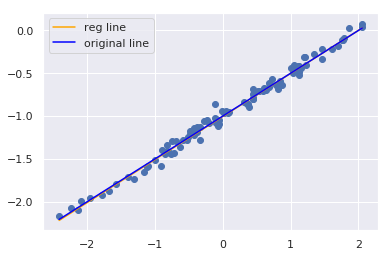

In [47]:
min_x=min(x)
max_x=max(x)
plt.scatter(x=x,y=y)
plt.plot([min(x),max(x)],[-1.0047+0.5028 	*min(x),-1.0047+0.5028 	*max(x)],color="Orange",label="reg line")
plt.plot([min(x),max(x)],[-1+0.5*min(x),-1+0.5*max(x)],color="Blue",label="original line")
plt.legend()

In [48]:
x=np.random.normal(loc=0,scale=1,size=(100))
e=np.random.normal(loc=0,scale=1,size=(100))
y=0.5*x-1+e

In [49]:
lr=sm.OLS(y,sm.add_constant(x))
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     26.62
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           1.29e-06
Time:                        17:57:10   Log-Likelihood:                -144.46
No. Observations:                 100   AIC:                             292.9
Df Residuals:                      98   BIC:                             298.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0941      0.104    -10.538      0.000      -1.300      -0.888
x1             0.5566      0.108      5.160      0.000       0.343       0.771
==============================================================================
Omnibus:                        1.109   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.610
Skew:                          -0.004   Prob(JB):                        0.737
Kurtosis:                       3.383   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

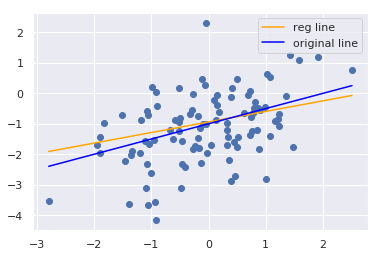

In [50]:
min_x=min(x)
max_x=max(x)
plt.scatter(x=x,y=y)
plt.plot([min(x),max(x)],[-0.9403+0.3470*min(x),-0.9403+0.3470*max(x)],color="Orange",label="reg line")
plt.plot([min(x),max(x)],[-1+0.5*min(x),-1+0.5*max(x)],color="Blue",label="original line")
plt.legend()

## 14.

In [51]:
x1=np.random.normal(loc=0,scale=1,size=(100))
x2=0.5*x1+np.random.normal(scale=0.1,size=(100))
e=np.random.normal(loc=0,scale=1,size=(100))
y=2+2*x1+0.3*x2+e

In [52]:
data=pd.DataFrame({"x1":x1,"x2":x2,"y":y})
data.head()

,x1,x2,y
0,0.814343,0.362502,3.584201
1,0.780470,0.410673,1.251633
2,-1.464054,-0.670804,-0.621364
3,-0.154491,-0.002757,1.366158
4,-0.092432,-0.049844,0.289105


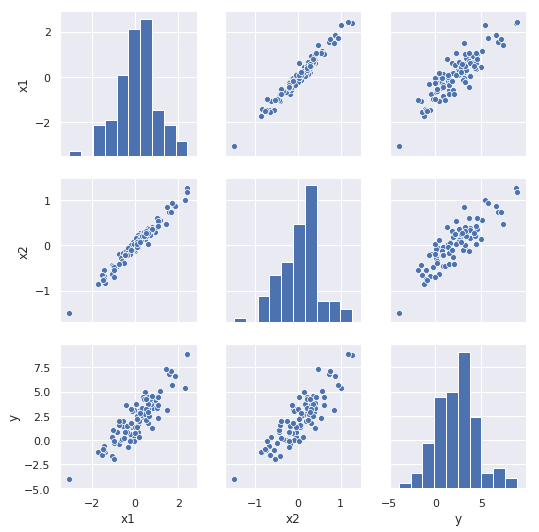

In [53]:
sns.pairplot(data)

In [54]:
data.corr()

,x1,x2,y
x1,1.000000,0.981644,0.88667
x2,0.981644,1.000000,0.86926
y,0.886670,0.869260,1.00000


In [55]:
lr=sm.OLS.from_formula("y~x1+x2",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     178.4
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           3.19e-33
Time:                        17:57:12   Log-Likelihood:                -147.23
No. Observations:                 100   AIC:                             300.5
Df Residuals:                      97   BIC:                             308.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0335      0.108     18.819      0.000       1.819       2.248
x1             2.2637      0.607      3.727      0.000       1.058       3.469
x2            -0.1558      1.230     -0.127      0.899      -2.598       2.286
==============================================================================
Omnibus:                        0.546   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.686
Skew:                          -0.145   Prob(JB):                        0.710
Kurtosis:                       2.716   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
results.params

Intercept    2.033542
x1           2.263721
x2          -0.155786
dtype: float64

In [57]:
print("Intercept 2\nx1 2\nx2 0.3")

Intercept 2
x1 2
x2 0.3


In [58]:
lr=sm.OLS.from_formula("y~x1",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     360.3
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           1.34e-34
Time:                        17:57:12   Log-Likelihood:                -147.23
No. Observations:                 100   AIC:                             298.5
Df Residuals:                      98   BIC:                             303.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0326      0.107     18.949      0.000       1.820       2.245
x1             2.1882      0.115     18.983      0.000       1.959       2.417
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.661
Skew:                          -0.143   Prob(JB):                        0.719
Kurtosis:                       2.722   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
lr=sm.OLS.from_formula("y~x2",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     303.0
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           9.56e-32
Time:                        17:57:12   Log-Likelihood:                -153.92
No. Observations:                 100   AIC:                             311.8
Df Residuals:                      98   BIC:                             317.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0155      0.115     17.552      0.000       1.788       2.243
x2             4.3447      0.250     17.407      0.000       3.849       4.840
==============================================================================
Omnibus:                        0.217   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.092
Skew:                           0.074   Prob(JB):                        0.955
Kurtosis:                       3.006   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
x1=np.random.normal(loc=0,scale=1,size=(100))
x2=0.5*x1+np.random.normal(scale=0.1,size=(100))
e=np.random.normal(loc=0,scale=1,size=(100))
y=2+2*x1+0.3*x2+e
data=pd.DataFrame({"x1":x1,"x2":x2,"y":y})
data=data.append({"x1":0.1,"x2":0.8,"y":6},ignore_index=True)

In [61]:
data.tail()

,x1,x2,y
96,-0.646491,-0.262942,1.937068
97,-1.448992,-0.693053,-0.372826
98,0.779492,0.423057,4.338081
99,-1.086301,-0.746404,-0.628008
100,0.100000,0.800000,6.000000


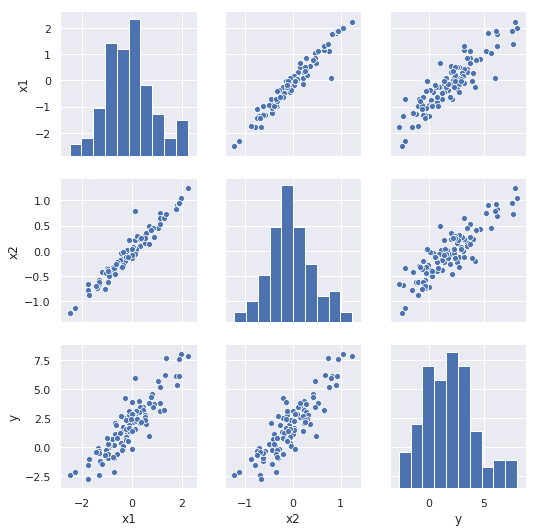

In [62]:
sns.pairplot(data,)

In [63]:
data.corr()

,x1,x2,y
x1,1.000000,0.969246,0.894233
x2,0.969246,1.000000,0.878041
y,0.894233,0.878041,1.000000


In [64]:
lr=sm.OLS.from_formula("y~x1+x2",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     198.2
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           3.65e-35
Time:                        17:57:14   Log-Likelihood:                -148.14
No. Observations:                 101   AIC:                             302.3
Df Residuals:                      98   BIC:                             310.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1343      0.109     19.558      0.000       1.918       2.351
x1             1.7963      0.460      3.903      0.000       0.883       2.710
x2             0.9218      0.902      1.022      0.309      -0.869       2.712
==============================================================================
Omnibus:                        1.345   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                0.838
Skew:                           0.032   Prob(JB):                        0.658
Kurtosis:                       3.442   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

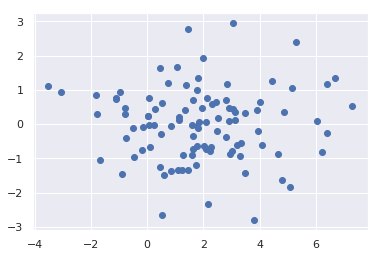

In [65]:
plt.scatter(results.fittedvalues,results.resid)

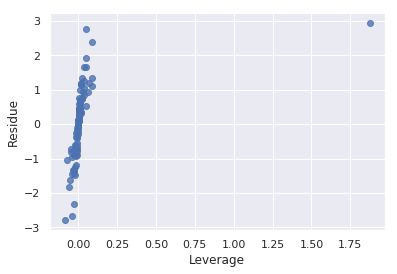

In [66]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(results).influence, name = "Leverage")
s_residuals=pd.Series(results.resid,name="Residue")
sns.regplot(leverage, s_residuals,  fit_reg=False)

In [67]:
lr=sm.OLS.from_formula("y~x1",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     395.1
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           2.45e-36
Time:                        17:57:14   Log-Likelihood:                -148.67
No. Observations:                 101   AIC:                             301.3
Df Residuals:                      99   BIC:                             306.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1572      0.107     20.195      0.000       1.945       2.369
x1             2.2521      0.113     19.878      0.000       2.027       2.477
==============================================================================
Omnibus:                        4.076   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.302
Skew:                           0.195   Prob(JB):                        0.116
Kurtosis:                       3.933   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

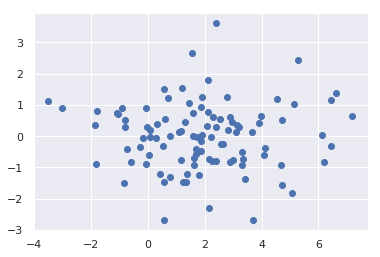

In [68]:
plt.scatter(results.fittedvalues,results.resid)

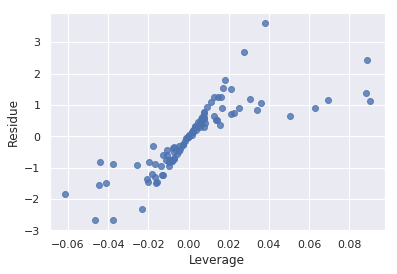

In [69]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(results).influence, name = "Leverage")
s_residuals=pd.Series(results.resid,name="Residue")
sns.regplot(leverage, s_residuals,  fit_reg=False)

In [70]:
lr=sm.OLS.from_formula("y~x2",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     333.2
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           1.88e-33
Time:                        17:57:15   Log-Likelihood:                -155.43
No. Observations:                 101   AIC:                             314.9
Df Residuals:                      99   BIC:                             320.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0366      0.114     17.929      0.000       1.811       2.262
x2             4.3346      0.237     18.255      0.000       3.863       4.806
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   2.428
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.365
Skew:                          -0.095   Prob(JB):                        0.833
Kurtosis:                       3.225   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

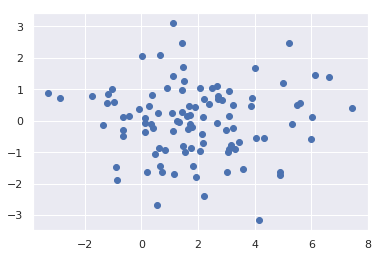

In [71]:
plt.scatter(results.fittedvalues,results.resid)

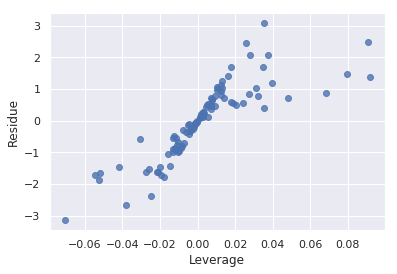

In [72]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(results).influence, name = "Leverage")
s_residuals=pd.Series(results.resid,name="Residue")
sns.regplot(leverage, s_residuals,  fit_reg=False)

## 15.

In [74]:
data=pd.read_csv("Boston.csv",index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


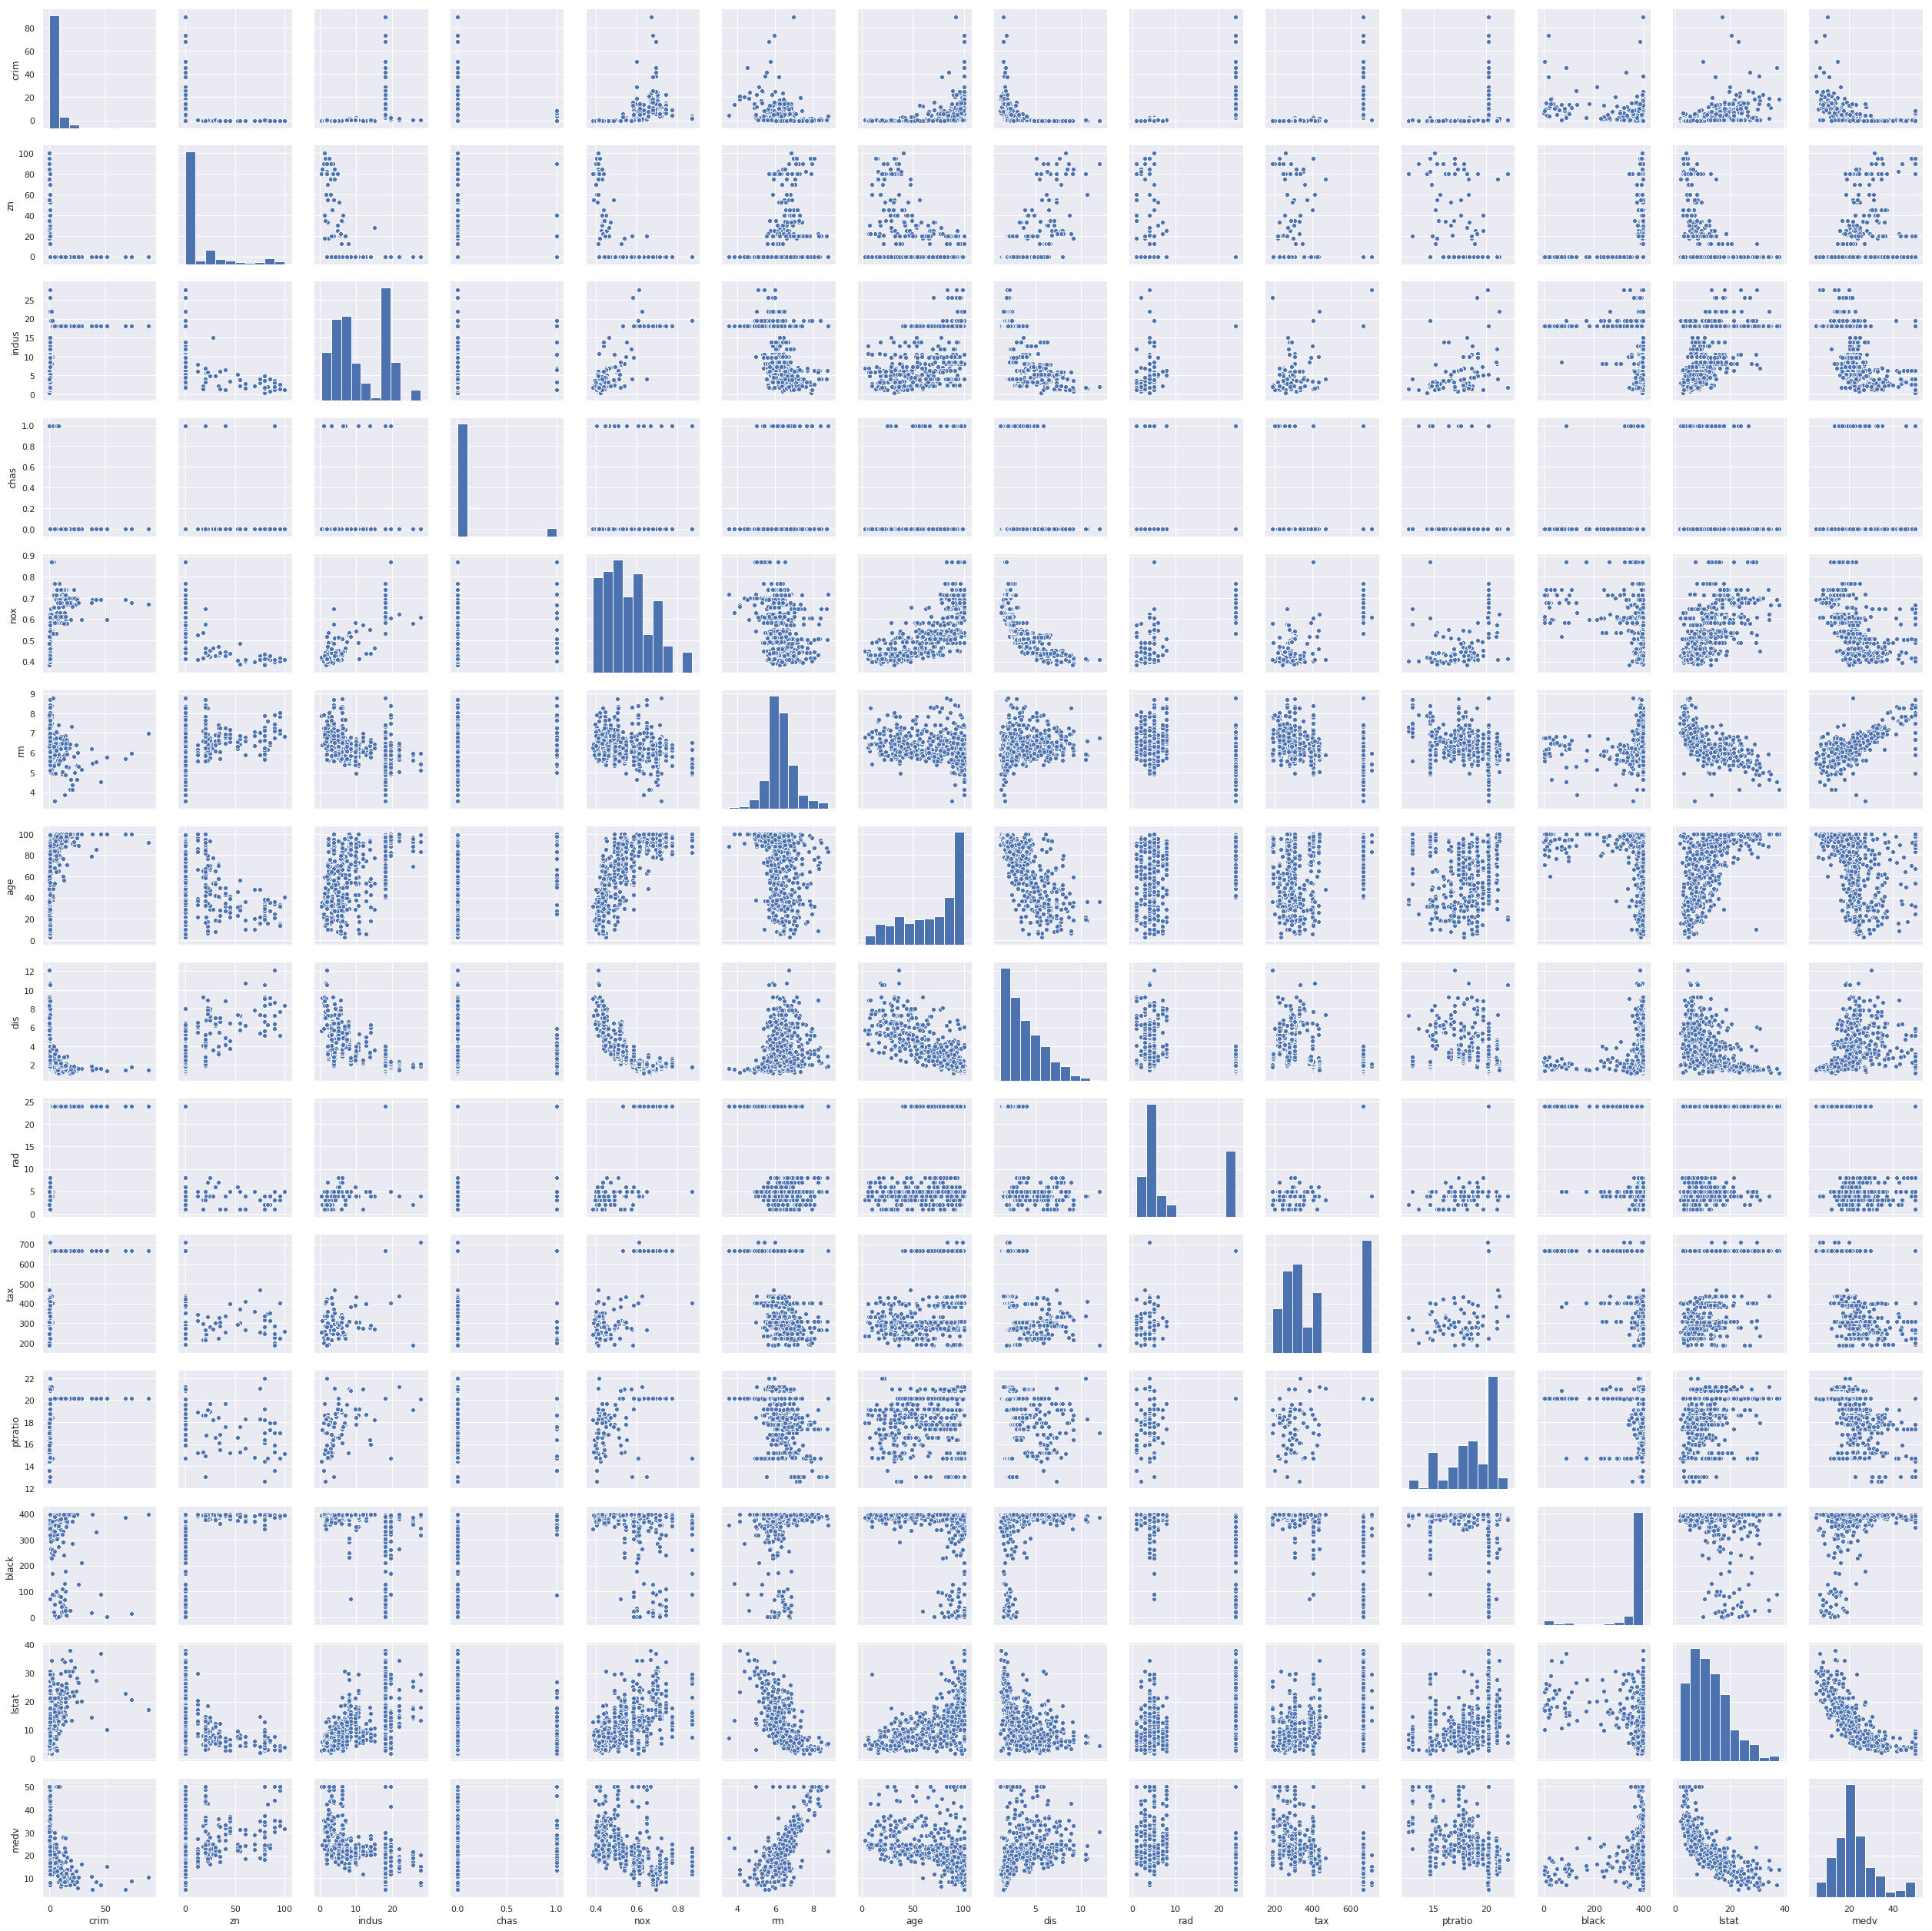

In [75]:
sns.pairplot(data)

In [76]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [93]:
# chas and crim have no relationship

In [153]:
lr=sm.OLS.from_formula("crim~"+"+".join(data.columns.difference(["crim"])),data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           1.57e-56
Time:                        18:29:03   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
age            0.0015      0.018      0.081      0.935      -0.034       0.037
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
rad            0.5882      0.088      6.680      0.000       0.415       0.761
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
zn             0.0449      0.019      2.394      0.017       0.008       0.082
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
y=results.params[1:]
x=[]
for i in y.index:
    results=sm.OLS.from_formula("crim~"+i,data).fit()
    x.append(results.params[1:])

In [157]:
y

age         0.001452
black      -0.007538
chas       -0.749134
dis        -0.987176
indus      -0.063855
lstat       0.126211
medv       -0.198887
nox       -10.313535
ptratio    -0.271081
rad         0.588209
rm          0.430131
tax        -0.003780
zn          0.044855
dtype: float64

In [156]:
x

[age    0.107786
 dtype: float64, black   -0.03628
 dtype: float64, chas   -1.892777
 dtype: float64, dis   -1.550902
 dtype: float64, indus    0.509776
 dtype: float64, lstat    0.548805
 dtype: float64, medv   -0.36316
 dtype: float64, nox    31.248531
 dtype: float64, ptratio    1.151983
 dtype: float64, rad    0.617911
 dtype: float64, rm   -2.684051
 dtype: float64, tax    0.029742
 dtype: float64, zn   -0.073935
 dtype: float64]

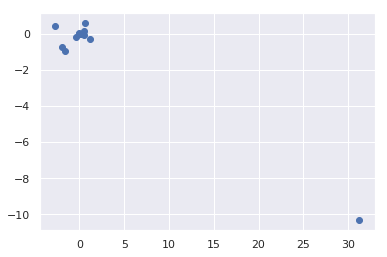

In [158]:
plt.scatter(x,y)

In [160]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')